# Week 3: Day 4 – Accessing Databases with Python

## Reading Data from SQL database

In [ ]:
# importing the necessary libraries
from PIL import Image
import numpy as np
from IPython.display import display

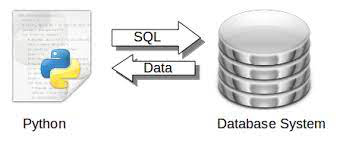

In [ ]:
im=Image.open('accessing database.jpg')
display(im)
array=np.array

In [ ]:
# loading library
import pandas as pd

In [ ]:
# importing sqlite3 in other to connect to server
import sqlite3

In [ ]:
# connecting to the sql data base
conn=sqlite3.connect("Downloads/chinook.db")

In [ ]:
#lets create a cursor that allows us to execute sql
cur=conn.cursor()

In [ ]:
# lets fetch the fist 5 rows of the employee table
cur.execute("SELECT * FROM employees LIMIT 5;")

In [ ]:
# the fetch all method is use to fetch all the result of a query
results=cur.fetchall()

In [ ]:
# returns a list of tuples
results

[(1,
  'Adams',
  'Andrew',
  'General Manager',
  None,
  '1962-02-18 00:00:00',
  '2002-08-14 00:00:00',
  '11120 Jasper Ave NW',
  'Edmonton',
  'AB',
  'Canada',
  'T5K 2N1',
  '+1 (780) 428-9482',
  '+1 (780) 428-3457',
  'andrew@chinookcorp.com'),
 (2,
  'Edwards',
  'Nancy',
  'Sales Manager',
  1,
  '1958-12-08 00:00:00',
  '2002-05-01 00:00:00',
  '825 8 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 2T3',
  '+1 (403) 262-3443',
  '+1 (403) 262-3322',
  'nancy@chinookcorp.com'),
 (3,
  'Peacock',
  'Jane',
  'Sales Support Agent',
  2,
  '1973-08-29 00:00:00',
  '2002-04-01 00:00:00',
  '1111 6 Ave SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5M5',
  '+1 (403) 262-3443',
  '+1 (403) 262-6712',
  'jane@chinookcorp.com'),
 (4,
  'Park',
  'Margaret',
  'Sales Support Agent',
  2,
  '1947-09-19 00:00:00',
  '2003-05-03 00:00:00',
  '683 10 Street SW',
  'Calgary',
  'AB',
  'Canada',
  'T2P 5G3',
  '+1 (403) 263-4423',
  '+1 (403) 263-4289',
  'margaret@chinookcorp.com'),
 (5,


In [ ]:
# lets manualy create a dataframe out of the info
df=pd.DataFrame(results)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
# This closes a connection object and opens a cursor object
cur.close
conn.close()

### Using Pandas read_sql_query() method

In [ ]:
# This function reads the results of sql query directly into a pandas datafram
conn=sqlite3.connect("Downloads/chinook.db")

In [ ]:
# here its going to run a query and read it into a DataFrame
df=pd.read_sql("SELECT * FROM employees;", conn)

In [ ]:
# The .head() returns the first five columns of your dataset
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
# loading the table
df=pd.read_sql("SELECT * FROM employees;", conn,
              index_col="EmployeeId",
              parse_dates=["BirthDate", "HireDate"])

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
# The .info() method returns the sammary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LastName    8 non-null      object        
 1   FirstName   8 non-null      object        
 2   Title       8 non-null      object        
 3   ReportsTo   7 non-null      float64       
 4   BirthDate   8 non-null      datetime64[ns]
 5   HireDate    8 non-null      datetime64[ns]
 6   Address     8 non-null      object        
 7   City        8 non-null      object        
 8   State       8 non-null      object        
 9   Country     8 non-null      object        
 10  PostalCode  8 non-null      object        
 11  Phone       8 non-null      object        
 12  Fax         8 non-null      object        
 13  Email       8 non-null      object        
dtypes: datetime64[ns](2), float64(1), object(11)
memory usage: 960.0+ bytes


In [ ]:
# isna() method returns the sum of null value
df["ReportsTo"].isna().sum()

1

In [ ]:
# .mean() method returns the mean of the dataframe
df["ReportsTo"].mean()

2.857142857142857

In [ ]:
# returns a bool of true or false of value grater than 1.75
df["ReportsTo"]>1.75

EmployeeId
1    False
2    False
3     True
4     True
5     True
6    False
7     True
8     True
Name: ReportsTo, dtype: bool

In [ ]:
# astype() cast a pandas object to a specified data type (dtype) 
df["City"]=df["City"].astype("category")

In [ ]:
# The info() method prints information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1 to 8
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LastName    8 non-null      object        
 1   FirstName   8 non-null      object        
 2   Title       8 non-null      object        
 3   ReportsTo   7 non-null      float64       
 4   BirthDate   8 non-null      datetime64[ns]
 5   HireDate    8 non-null      datetime64[ns]
 6   Address     8 non-null      object        
 7   City        8 non-null      category      
 8   State       8 non-null      object        
 9   Country     8 non-null      object        
 10  PostalCode  8 non-null      object        
 11  Phone       8 non-null      object        
 12  Fax         8 non-null      object        
 13  Email       8 non-null      object        
dtypes: category(1), datetime64[ns](2), float64(1), object(10)
memory usage: 1.0+ KB


### Using read_sql_table method

In [ ]:
# To use this method you need to install the library sqlalchemy
from sqlalchemy import create_engine

In [ ]:
# Here we create an engine and a connection
engine=create_engine("sqlite:///Downloads/chinook.db")
connection=engine.connect()

In [ ]:
# Here we read the entire table, and pass on the connection
df=pd.read_sql_table("employees", con=connection)
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df.head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
df=pd.read_sql_table("employees", con=connection,
                     index_col="EmployeeId",
                     parse_dates=["BirthDate", "HireDate"])

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
connection.close()

### Create Tables from DataFrame Objects

In [ ]:
df.head()

,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
EmployeeId,,,,,,,,,,,,,,
1,Adams,Andrew,General Manager,NaN,1962-02-18,2002-08-14,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1.0,1958-12-08,2002-05-01,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29,2002-04-01,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2.0,1947-09-19,2003-05-03,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03,2003-10-17,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [ ]:
# .to_sql() method Write records stored in a DataFrame to a SQL database.
df.to_sql()

NameError: ignored

In [ ]:
# Creating a cursor object
cur=conn.cursor()

In [ ]:
# Making an execution
cur.execute("DROP TABLE IF EXISTS employees2;")

In [ ]:
# Closing a cursor object connection
cur.close()

In [ ]:
df.to_sql("employees2", conn)

In [ ]:
pd.read_sql_query("SELECT * FROM employees2;", conn).head()

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


# How To Use SQLite Database With Python

In [ ]:
import sqlite3 

In [ ]:
connection = sqlite3.connect('data.db')

cursor = connection.cursor()

cursor.execute('CREATE TABLE STUDENT (Name text, Gender text)')
cursor.execute("INSERT INTO STUDENT VALUES('Max', 'M')")
cursor.execute("INSERT INTO STUDENT VALUES('Sally', 'F')")
cursor.execute("INSERT INTO STUDENT VALUES('Sarah', 'F')")

connection.commit()

connection.close()